In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Accessing the Final Project folder 
%cd '/content/drive/MyDrive/Georgia Tech/Machine Learning-CS7641/Assignments/Assignment #4'

/content/drive/MyDrive/Georgia Tech/Machine Learning-CS7641/Assignments/Assignment #4


In [3]:
% cd hiivemdptoolbox/

/content/drive/MyDrive/Georgia Tech/Machine Learning-CS7641/Assignments/Assignment #4/hiivemdptoolbox


In [4]:
import hiive.mdptoolbox.example

In [5]:
P_large, R_large = hiive.mdptoolbox.example.forest(S = 512, p = 0.3)

In [6]:
P_large.shape

(2, 512, 512)

In [7]:
R_large.shape

(512, 2)

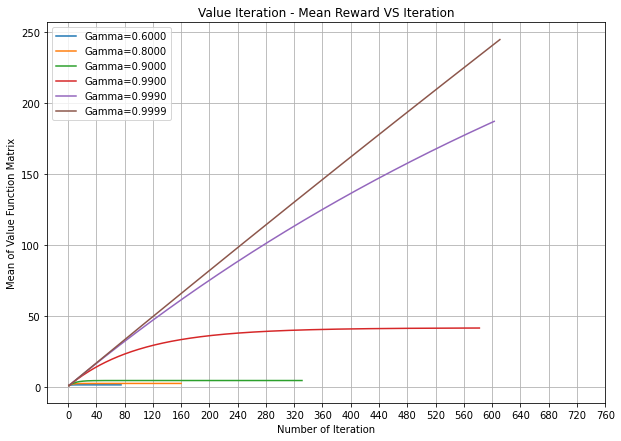

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10,7))
plt.grid()
Gamma = [0.6, 0.8, 0.9, 0.99, 0.999, 0.9999]


for g in Gamma:
  vi_forest_large = hiive.mdptoolbox.mdp.ValueIteration(P_large, R_large, gamma= g, epsilon= 1e-90, max_iter=2000)
  vi_forest_large.run()
  df = pd.DataFrame(vi_forest_large.run_stats)
  plt.plot(df['Iteration'], df['Mean V'], label= 'Gamma={:.4f}'.format(g))


plt.legend(loc= 'best')
plt.xticks(range(0,800, 40))
plt.xlabel('Number of Iteration')
plt.ylabel('Mean of Value Function Matrix')
plt.title('Value Iteration - Mean Reward VS Iteration')
plt.show()

In [58]:
#optimal Value Itearation

vi_forest_large_optimal = hiive.mdptoolbox.mdp.ValueIteration(P_large, R_large, gamma= 0.99, epsilon= 1e-60)
vi_forest_large_optimal.run()

[{'Action': None,
  'Error': 4.0,
  'Iteration': 1,
  'Max V': 4.0,
  'Mean V': 1.00390625,
  'Reward': 4.0,
  'State': None,
  'Time': 0.00035381317138671875},
 {'Action': None,
  'Error': 2.7720000000000002,
  'Iteration': 2,
  'Max V': 6.772,
  'Mean V': 1.014134765625,
  'Reward': 6.772,
  'State': None,
  'Time': 0.0007319450378417969},
 {'Action': None,
  'Error': 2.1268169999999995,
  'Iteration': 3,
  'Max V': 8.898817,
  'Mean V': 1.7057555312500006,
  'Reward': 8.898817,
  'State': None,
  'Time': 0.001102447509765625},
 {'Action': None,
  'Error': 1.535013017999999,
  'Iteration': 4,
  'Max V': 10.433830017999998,
  'Mean V': 1.917968640080078,
  'Reward': 10.433830017999998,
  'State': None,
  'Time': 0.0014426708221435547},
 {'Action': None,
  'Error': 1.2231268995329998,
  'Iteration': 5,
  'Max V': 11.656956917532998,
  'Mean V': 2.4538423573405685,
  'Reward': 11.656956917532998,
  'State': None,
  'Time': 0.0017583370208740234},
 {'Action': None,
  'Error': 0.936896377

In [10]:
#Optimal Policy
vi_opt_policy = np.reshape(vi_forest_large_optimal.policy, (1,512))

In [11]:
from IPython.core.pylabtools import figsize
def heat_map(matrix, length, wide, title, move_dict = None):
  fig, ax = plt.subplots(figsize=(200,400))
  im = ax.imshow(matrix.T)

  # Show all ticks and label them with the respective list entries
  ax.set_xticks(np.arange(len(range(length))))
  ax.set_yticks(np.arange(len(range(wide))))

  # Loop over data dimensions and create text annotations.
  for i in range(len(range(length))):
      for j in range(len(range(wide))):
        if move_dict:
          text = ax.text(i, j, move_dict[matrix[i, j]],
                        ha="center", va="center", color="w")
        else:
          text = ax.text(i, j, np.round(matrix[i, j],1),
                        ha="center", va="center", color="w")

  ax.set_title(title)
  # fig.tight_layout()
  plt.show()

In [12]:
move_dict = {0: 'W', 1: 'C'}

In [13]:
vi_opt_policy

array([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

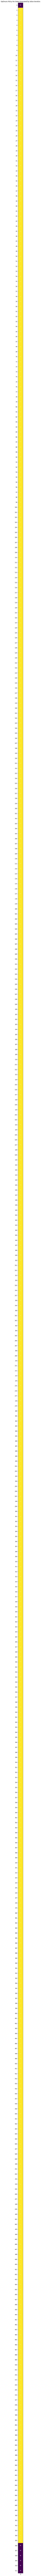

In [14]:
heat_map(vi_opt_policy, 1, 512,  "Optimum Policy Per State Generated by Value Iteration" ,move_dict= move_dict)

In [15]:
#Value function of optimal Policy
vi_opt_value = np.reshape(vi_forest_large_optimal.V, (1,512))

In [16]:
vi_opt_value.round(1)

array([[40.1, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7,
        40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7,
        40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7,
        40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7,
        40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7,
        40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7,
        40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7,
        40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7,
        40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7,
        40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7,
        40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7,
        40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7,
        40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7,
        40.7, 40.7, 40.7, 40.7, 40.7, 

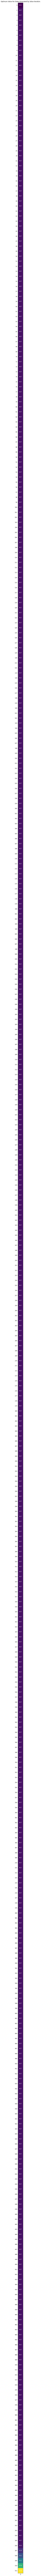

In [17]:
heat_map(vi_opt_value, 1, 512, "Optimum Value Per State Generated by Value Iteration")

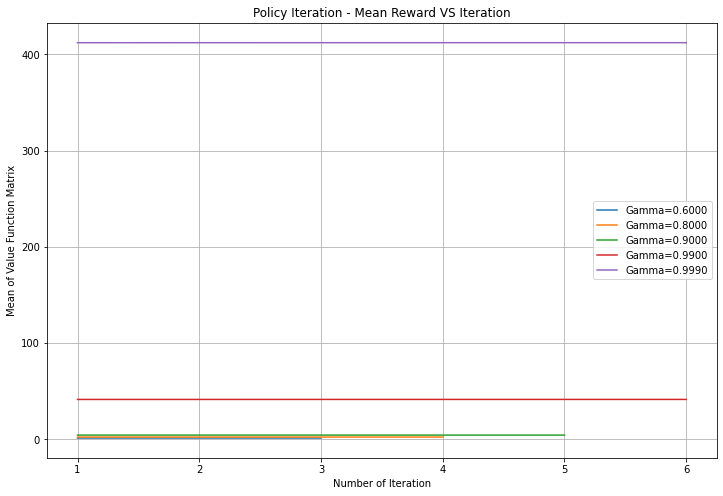

In [18]:
#Policy Iteration

figure(figsize=(12,8))
plt.grid()
Gamma = [0.6, 0.8, 0.9, 0.99, 0.999]


for g in Gamma:
  pi_forest_large = hiive.mdptoolbox.mdp.PolicyIteration(P_large, R_large, gamma= g)
  pi_forest_large.run()
  df_pi = pd.DataFrame(pi_forest_large.run_stats)
  plt.plot(df_pi['Iteration'], df_pi['Mean V'], label= 'Gamma={:.4f}'.format(g))


plt.legend(loc= 'best')
plt.xlabel('Number of Iteration')
plt.ylabel('Mean of Value Function Matrix')
plt.title('Policy Iteration - Mean Reward VS Iteration')
plt.show()

In [19]:
#Optimal Policy Iteration
pi_forest_large_optimal = hiive.mdptoolbox.mdp.PolicyIteration(P_large, R_large, gamma= 0.99)
pi_forest_large_optimal.run()

[{'Action': None,
  'Error': 7.105317738686402,
  'Iteration': 1,
  'Max V': 52.62923977058202,
  'Mean V': 41.54445845823246,
  'Reward': 52.62923977058202,
  'State': None,
  'Time': 0.01554560661315918,
  'V[0]': 40.933254577672336},
 {'Action': None,
  'Error': 4.333317738686418,
  'Iteration': 2,
  'Max V': 52.62923977058202,
  'Mean V': 41.55833603194082,
  'Reward': 52.62923977058202,
  'State': None,
  'Time': 0.028859376907348633,
  'V[0]': 40.933254577672315},
 {'Action': None,
  'Error': 2.412321738686394,
  'Iteration': 3,
  'Max V': 52.62923977058202,
  'Mean V': 41.56679954314921,
  'Reward': 52.62923977058202,
  'State': None,
  'Time': 0.04971718788146973,
  'V[0]': 40.93325457767236},
 {'Action': None,
  'Error': 1.0810715106863782,
  'Iteration': 4,
  'Max V': 52.62923977058202,
  'Mean V': 41.571511109045105,
  'Reward': 52.62923977058202,
  'State': None,
  'Time': 0.06298184394836426,
  'V[0]': 40.933254577672386},
 {'Action': None,
  'Error': 0.15851510268239366,


In [20]:
#Optimal Policy
pi_opt_policy = np.reshape(pi_forest_large_optimal.policy, (1,512))

In [21]:
pi_opt_policy

array([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

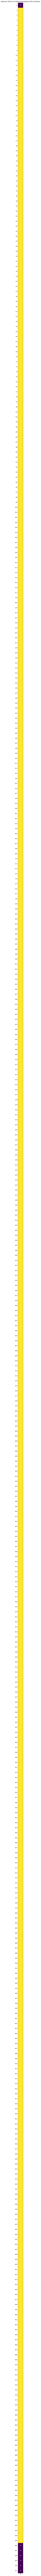

In [22]:
heat_map(pi_opt_policy, 1, 512, "Optimum Policy Per State Generated by Policy Iteration" ,move_dict= move_dict)

In [23]:
#Value function of optimal Policy
pi_opt_value = np.reshape(pi_forest_large_optimal.V, (1,512))

In [24]:
pi_opt_value.round(1)

array([[40.9, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5,
        41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5,
        41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5,
        41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5,
        41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5,
        41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5,
        41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5,
        41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5,
        41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5,
        41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5,
        41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5,
        41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5,
        41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5,
        41.5, 41.5, 41.5, 41.5, 41.5, 

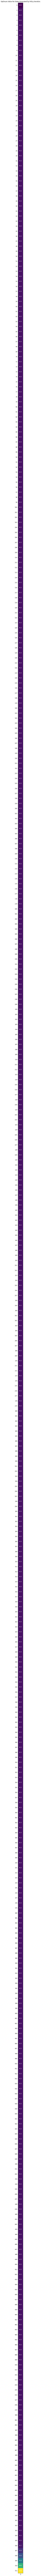

In [25]:
heat_map(pi_opt_value, 1, 512, "Optimum Value Per State Generated by Policy Iteration")

In [26]:
# Checking If Policies generated by VI and PI are same
vi_forest_large_optimal.policy == pi_forest_large_optimal.policy

True

In [27]:
res = tuple(map(lambda i, j: i - j, vi_forest_large_optimal.policy, pi_forest_large_optimal.policy)) 
#Finding the states which policy differs 

non_zero_index = np.nonzero(res)[0]

print(f'States which policy is differ {non_zero_index}')

States which policy is differ []


In [28]:
different_policy = np.reshape(res, (1,512))

In [29]:
diff_move = {0: 'S', -1: 'D'}

In [54]:
different_policy

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

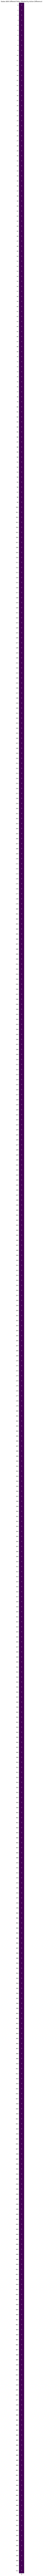

In [31]:
heat_map(different_policy, 1, 512, 'States With Different Policy (Marked by Action Difference)', move_dict= diff_move)

In [32]:
df_vi_optim_small = pd.DataFrame(vi_forest_large_optimal.run_stats)
df_pi_optim_small = pd.DataFrame(pi_forest_large_optimal.run_stats)

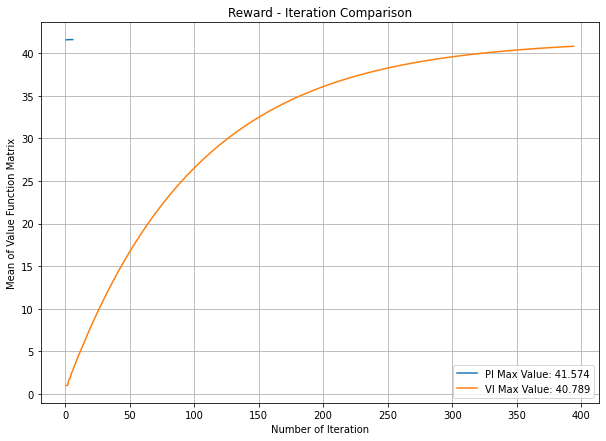

In [33]:
figure(figsize=(10,7))
plt.grid()

plt.plot(df_pi_optim_small['Iteration'], df_pi_optim_small['Mean V'], label ='PI Max Value: {:0.3f}'.format(df_pi_optim_small['Mean V'].max()))
plt.plot(df_vi_optim_small['Iteration'], df_vi_optim_small['Mean V'], label ='VI Max Value: {:0.3f}'.format(df_vi_optim_small['Mean V'].max()))
plt.legend(loc='best')
plt.xlabel('Number of Iteration')
plt.ylabel('Mean of Value Function Matrix')
plt.title('Reward - Iteration Comparison')
plt.show()

In [34]:
ql = hiive.mdptoolbox.mdp.QLearning(P_large, R_large, 0.99)
ql.run()

[{'Action': 1,
  'Alpha': 0.1,
  'Epsilon': 1.0,
  'Error': 0.1,
  'Gamma': 0.99,
  'Iteration': 1,
  'Max V': 0.1,
  'Mean V': 0.0001953125,
  'Reward': 1.0,
  'State': 164,
  'Time': 0.00018644332885742188,
  'V[0]': 0.0},
 {'Action': 1,
  'Alpha': 0.099,
  'Epsilon': 0.99,
  'Error': 0.0,
  'Gamma': 0.99,
  'Iteration': 2,
  'Max V': 0.1,
  'Mean V': 0.0001953125,
  'Reward': 0.0,
  'State': 0,
  'Time': 0.0003948211669921875,
  'V[0]': 0.0},
 {'Action': 0,
  'Alpha': 0.09801,
  'Epsilon': 0.9801,
  'Error': 0.0,
  'Gamma': 0.99,
  'Iteration': 3,
  'Max V': 0.1,
  'Mean V': 0.0001953125,
  'Reward': 0.0,
  'State': 0,
  'Time': 0.0005786418914794922,
  'V[0]': 0.0},
 {'Action': 0,
  'Alpha': 0.0970299,
  'Epsilon': 0.9702989999999999,
  'Error': 0.0,
  'Gamma': 0.99,
  'Iteration': 4,
  'Max V': 0.1,
  'Mean V': 0.0001953125,
  'Reward': 0.0,
  'State': 0,
  'Time': 0.0007333755493164062,
  'V[0]': 0.0},
 {'Action': 0,
  'Alpha': 0.096059601,
  'Epsilon': 0.96059601,
  'Error': 0.0

In [35]:
df_q = pd.DataFrame(ql.run_stats)

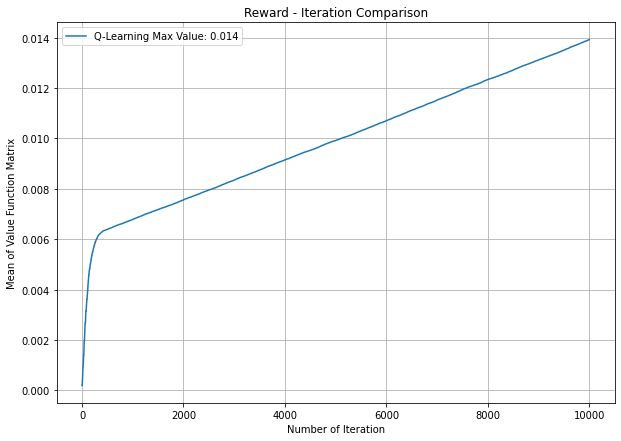

In [36]:
figure(figsize=(10,7))
plt.grid()

plt.plot(df_q['Iteration'], df_q['Mean V'], label ='Q-Learning Max Value: {:0.3f}'.format(df_q['Mean V'].max()))

plt.legend(loc='best')
plt.xlabel('Number of Iteration')
plt.ylabel('Mean of Value Function Matrix')
plt.title('Reward - Iteration Comparison')
plt.show()

In [37]:
ql_naive_policy = np.reshape(ql.policy, (1,512))

In [38]:
ql_naive_policy

array([[0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

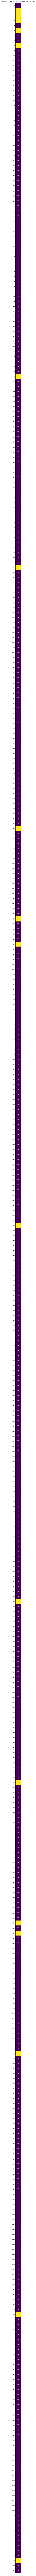

In [39]:
heat_map(ql_naive_policy, 1, 512, "Naive Policy Per State Generated by Q Learning" ,move_dict= move_dict)

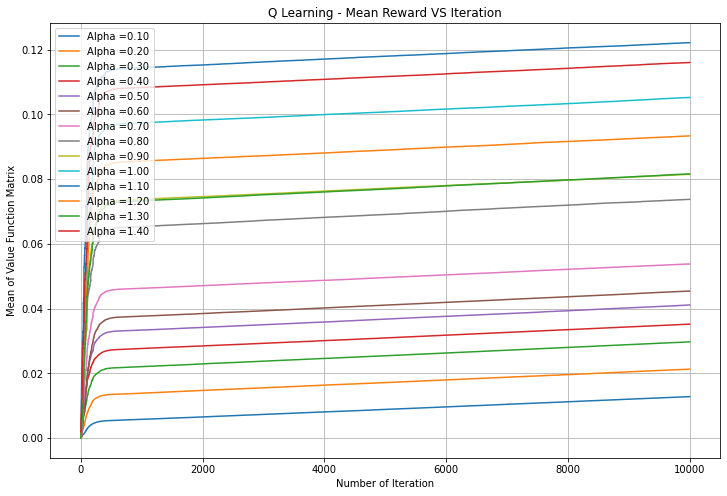

In [40]:
# Hyper-Parameter Tuning Alpha
figure(figsize=(12,8))
plt.grid()
alpha_list = list(np.arange(0.1, 1.5, 0.1))


for a in alpha_list:
  ql_forest_large = hiive.mdptoolbox.mdp.QLearning(P_large, R_large, 0.99, alpha= a)
  ql_forest_large.run()
  df_ql_a = pd.DataFrame(ql_forest_large.run_stats)
  plt.plot(df_ql_a['Iteration'], df_ql_a['Mean V'], label= 'Alpha ={:.2f}'.format(a))


plt.legend(loc= 'best')
plt.xlabel('Number of Iteration')
plt.ylabel('Mean of Value Function Matrix')
plt.title('Q Learning - Mean Reward VS Iteration')
plt.show()

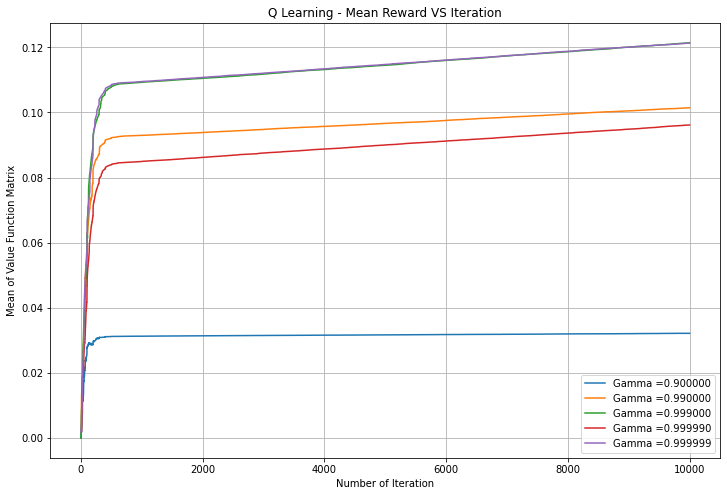

In [41]:
# Hyper Parameter Tuning Gamma
figure(figsize=(12,8))
plt.grid()
gamma_list = [0.9, 0.99, 0.999, 0.99999, 0.999999]


for g in gamma_list:
  ql_forest_large = hiive.mdptoolbox.mdp.QLearning(P_large, R_large, g, alpha= 1)
  ql_forest_large.run()
  df_ql_g = pd.DataFrame(ql_forest_large.run_stats)
  plt.plot(df_ql_g['Iteration'], df_ql_g['Mean V'], label= 'Gamma ={:.6f}'.format(g))


plt.legend(loc= 'best')
plt.xlabel('Number of Iteration')
plt.ylabel('Mean of Value Function Matrix')
plt.title('Q Learning - Mean Reward VS Iteration')
plt.show()

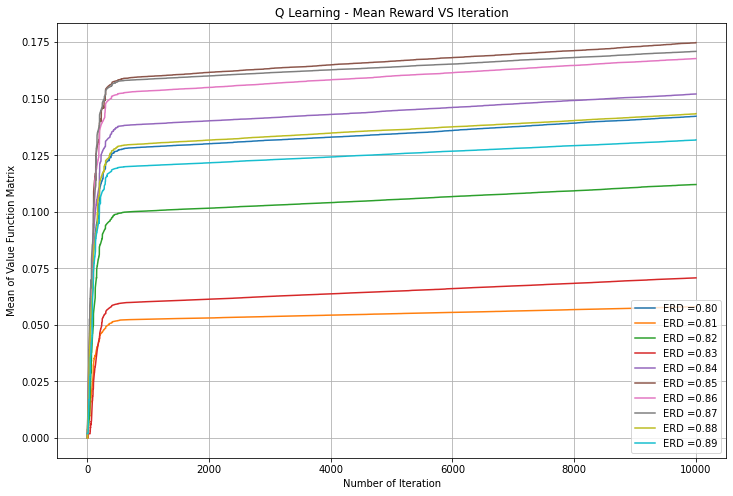

In [42]:
# Hyper Parameter tuning Epsilon decay rate
figure(figsize=(12,8))
plt.grid()
epsilon_decay_list = list(np.arange(0.8, 0.9, 0.01))


for ed in epsilon_decay_list:
  ql_forest_large = hiive.mdptoolbox.mdp.QLearning(P_large, R_large, 0.999, alpha= 1, epsilon_decay=ed)
  ql_forest_large.run()
  df_ql_erd = pd.DataFrame(ql_forest_large.run_stats)
  plt.plot(df_ql_erd['Iteration'], df_ql_erd['Mean V'], label= 'ERD ={:.2f}'.format(ed))


plt.legend(loc= 'best')
plt.xlabel('Number of Iteration')
plt.ylabel('Mean of Value Function Matrix')
plt.title('Q Learning - Mean Reward VS Iteration')
plt.show()

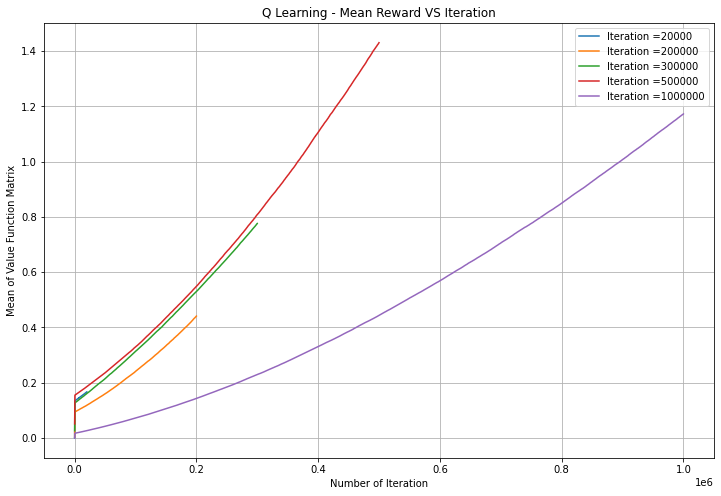

In [43]:
# Looks like by Increasing Number of Iteration we can achieve higher score
figure(figsize=(12,8))
plt.grid()
iteration_list = [20000, 200000, 300000, 500000, 1000000]


for iter in iteration_list:
  ql_forest_large = hiive.mdptoolbox.mdp.QLearning(P_large, R_large, 0.999, n_iter= iter, alpha=1, alpha_decay=0.99, epsilon_decay= 0.8)
  ql_forest_large.run()
  df_ql_iter = pd.DataFrame(ql_forest_large.run_stats)
  plt.plot(df_ql_iter['Iteration'], df_ql_iter['Mean V'], label= 'Iteration ={}'.format(iter))


plt.legend(loc= 'best')
plt.xlabel('Number of Iteration')
plt.ylabel('Mean of Value Function Matrix')
plt.title('Q Learning - Mean Reward VS Iteration')
plt.show()

In [44]:
ql_forest_large_optim = hiive.mdptoolbox.mdp.QLearning(P_large, R_large, 0.999, n_iter= 5000000, alpha=1, alpha_decay=0.99, epsilon_decay= 0.8)
ql_forest_large_optim.run()

[{'Action': 1,
  'Alpha': 0.006636851557994551,
  'Epsilon': 0.1,
  'Error': 0.05552658069554557,
  'Gamma': 0.999,
  'Iteration': 500,
  'Max V': 8.582122406909246,
  'Mean V': 0.0480790140501066,
  'Reward': 1.0,
  'State': 51,
  'Time': 0.04441189765930176,
  'V[0]': 8.096940417111115},
 {'Action': 0,
  'Alpha': 0.001,
  'Epsilon': 0.1,
  'Error': 0.0,
  'Gamma': 0.999,
  'Iteration': 1000,
  'Max V': 8.735031418764079,
  'Mean V': 0.04901967112974054,
  'Reward': 0.0,
  'State': 122,
  'Time': 0.08353328704833984,
  'V[0]': 8.250827426046293},
 {'Action': 0,
  'Alpha': 0.001,
  'Epsilon': 0.1,
  'Error': 0.00833755730080113,
  'Gamma': 0.999,
  'Iteration': 1500,
  'Max V': 8.83146429572369,
  'Mean V': 0.04955871895276451,
  'Reward': 0.0,
  'State': 435,
  'Time': 0.11912846565246582,
  'V[0]': 8.345903204005134},
 {'Action': 0,
  'Alpha': 0.001,
  'Epsilon': 0.1,
  'Error': 0.0,
  'Gamma': 0.999,
  'Iteration': 2000,
  'Max V': 8.92016611280984,
  'Mean V': 0.050081346592476185,

In [45]:
df_ql_optim = pd.DataFrame(ql_forest_large_optim.run_stats)

In [46]:
ql_optim_policy = np.reshape(ql_forest_large_optim.policy, (1,512))

In [47]:
ql_optim_policy

array([[0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
        0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 

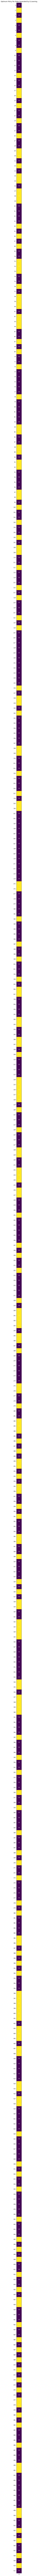

In [48]:
heat_map(ql_optim_policy, 1, 512, "Optimum Policy Per State Generated by Q Learning" ,move_dict= move_dict)

In [49]:
ql_opt_value = np.reshape(ql_forest_large_optim.V, (1,512))

In [50]:
ql_optim_policy.round(1)

array([[0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
        0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 

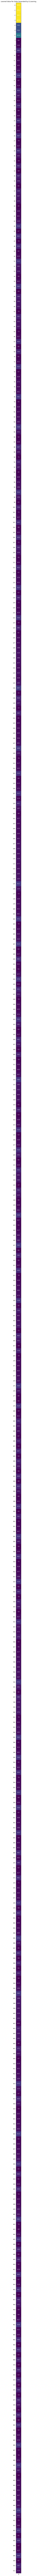

In [51]:
heat_map(ql_opt_value, 1, 512, "Learned Value Per State Generated by Q Learning")

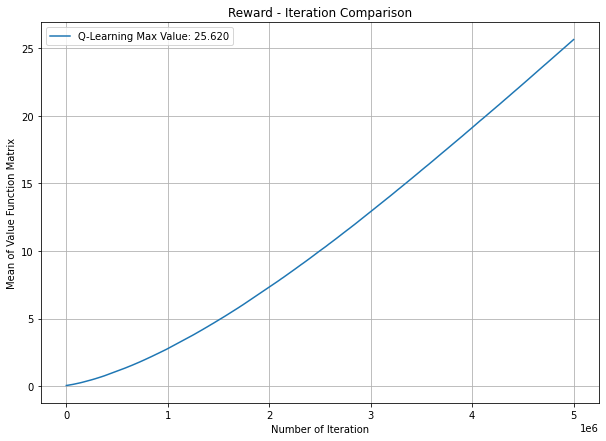

In [52]:
figure(figsize=(10,7))
plt.grid()

plt.plot(df_ql_optim['Iteration'], df_ql_optim['Mean V'], label ='Q-Learning Max Value: {:0.3f}'.format(df_ql_optim['Mean V'].max()))

plt.legend(loc='best')
plt.xlabel('Number of Iteration')
plt.ylabel('Mean of Value Function Matrix')
plt.title('Reward - Iteration Comparison')
plt.show()